## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_df.head()
# print(study_df.dtypes)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number = study_df["Mouse ID"]
number.count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
finding_dup = study_df[["Mouse ID", "Timepoint"]]
dup_data = finding_dup[finding_dup.duplicated("Mouse ID")]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = study_df[study_df.duplicated("Mouse ID")]

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = study_df.drop_duplicates("Mouse ID")

In [7]:
# Checking the number of mice in the clean DataFrame.
all_data["Mouse ID"].count()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_df[["Drug Regimen", "Tumor Volume (mm3)"]].head()
tvol_summary = study_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
tvol_summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data = study_df.set_index("Drug Regimen")
regimen_data = summary_data.groupby("Drug Regimen")
tvolume = regimen_data["Tumor Volume (mm3)"]
mean_tv = tvolume.mean()
median_tv = tvolume.median()
var_tv = tvolume.var()
stdev_tv = tvolume.std()
sem_tv = tvolume.sem()
# This method produces everything in a single groupby function
tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean_tv, "Median Tumor Volume": median_tv, "Tumor Volume Variance": var_tv, "Tumor Volume St. Dev.": stdev_tv, "Tumor Volume Std. Err": sem_tv})
tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

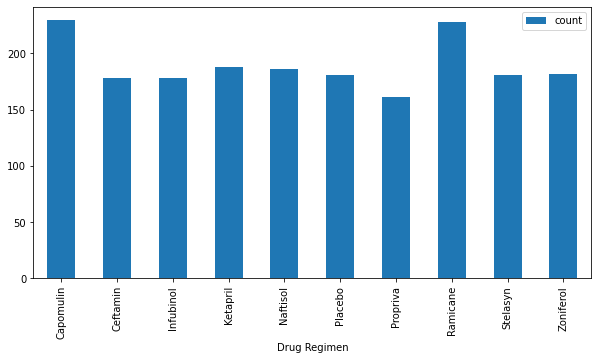

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
tvol_summary = study_df.groupby("Drug Regimen").agg(["count"])["Mouse ID"]
tvol_plot = tvol_summary.plot(kind="bar", figsize=(10,5))

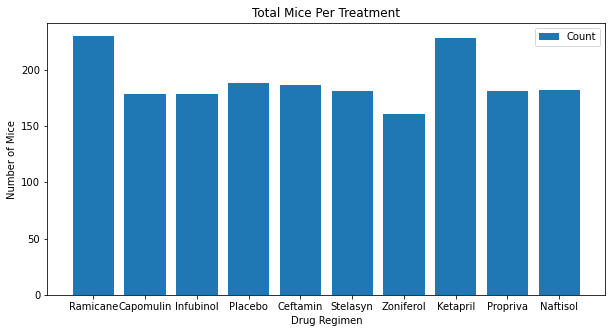

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
summary_data = study_df["Drug Regimen"]
drug_regimen = summary_data.drop_duplicates()
mouse_summary = study_df.set_index("Drug Regimen")
regimen_data = mouse_summary.groupby("Drug Regimen")
mouse = regimen_data["Mouse ID"]
m_count = mouse.count()

x_axis = drug_regimen
y_axis = m_count
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, label="Count")
plt.title("Total Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend(loc="best")

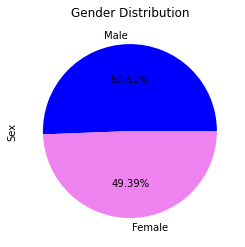

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = study_df["Sex"].value_counts()
gender_pie = gender.plot.pie(y=gender, autopct="%.2f%%", colors=['blue', 'violet'], title="Gender Distribution")



Text(0.5, 1.0, 'Gender Distribution')

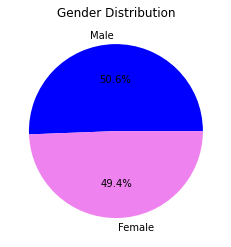

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = study_df["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["blue", "violet"]
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [14]:
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_reg = study_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
mouse = four_reg.groupby("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
final_vol = mouse["Timepoint"].max()
# final_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(final_vol, four_reg)
merge_df = merge_df.set_index("Drug Regimen")
del merge_df["Timepoint"]
merge_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Ramicane,k403,22.050126
Capomulin,s185,23.343598
Capomulin,x401,28.484033
Capomulin,m601,28.430964
Ramicane,g791,29.128472
...,...,...
Ceftamin,y769,55.025724
Ceftamin,y865,52.361982
Infubinol,z581,51.807944


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
